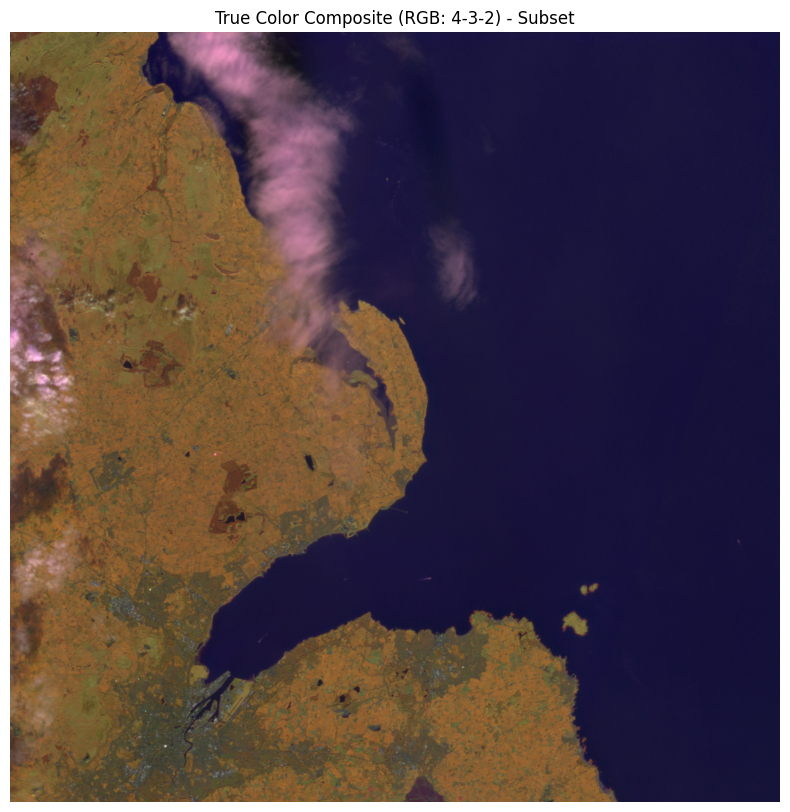

In [4]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path to your stacked Sentinel-2 GeoTIFF file
stacked_image_path = "/Users/wasifqazi/Desktop/FYP_Sentinel_2/output_path/Image_35_stacked.jp2"

try:
    # Open the stacked Sentinel-2 image
    with rasterio.open(stacked_image_path) as src:
        # Get image dimensions
        width = src.width
        height = src.height

        # Define a window (e.g., use the entire image or a subset)
        window_width = min(width, 5000)  # Adjust as needed
        window_height = min(height, 5000) # Adjust as needed
        window = rasterio.windows.Window(0, 0, window_width, window_height)

        # Read only this window from RGB bands
        B2 = src.read(2, window=window)  # Blue - Band 2
        B3 = src.read(3, window=window)  # Green - Band 3
        B4 = src.read(4, window=window)  # Red - Band 4

    # Normalize for display
    def normalize(band):
        band_min, band_max = np.min(band), np.max(band)
        return np.clip((band - band_min) / (band_max - band_min), 0, 1)

    # Stack the RGB bands
    rgb_image = np.stack([normalize(B4), normalize(B3), normalize(B2)], axis=-1)

    # Gamma correction
    gamma = 2.2
    rgb_image = np.power(rgb_image, 1/gamma)

    # Plot the True Color Composite
    plt.figure(figsize=(10, 10))  # Increased figure size
    plt.imshow(rgb_image)
    plt.title("True Color Composite (RGB: 4-3-2) - Subset")
    plt.axis("off")
    plt.show()

except rasterio.RasterioIOError as e:
    print(f"Error opening the image file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [18]:
import rasterio

stacked_image_path = "/Users/wasifqazi/Desktop/FYP_Sentinel_2/output_path/Image_36_stacked.tif"  # Replace with your file path

try:
    with rasterio.open(stacked_image_path) as src:
        print(f"Number of bands: {src.count}")
        print(f"Band Data Types: {src.dtypes}")
        print(f"Metadata Example: {src.tags(1)}")
except rasterio.RasterioIOError as e:
    print(f"Error opening image: {e}")

Number of bands: 12
Band Data Types: ('uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16')
Metadata Example: {}


In [21]:
import rasterio

stacked_image_path = "/Users/wasifqazi/Desktop/FYP_Sentinel_2/output_path/Image_1_stacked.tif" # Replace with your file path

try:
    with rasterio.open(stacked_image_path) as src:
        print(f"Number of bands: {src.count}")
        print(f"Band Data Types: {src.dtypes}")

        for i in range(1, src.count + 1):  # Iterate through each band
            band_data = src.read(i) #Read data
            print(f"--- Band {i} ---")
            print(f"  Min: {np.min(band_data)}, Max: {np.max(band_data)}, Mean: {np.mean(band_data)}")
            print(f"  Metadata: {src.tags(i)}")  # Print band-specific metadata
            
except rasterio.RasterioIOError as e:
    print(f"Error opening image: {e}")

Number of bands: 12
Band Data Types: ('uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16')
--- Band 1 ---
  Min: 0, Max: 16125, Mean: 2201.654277324893
  Metadata: {}
--- Band 2 ---
  Min: 0, Max: 18672, Mean: 1320.2853097451568
  Metadata: {}
--- Band 3 ---
  Min: 0, Max: 15622, Mean: 3124.1976238383418
  Metadata: {}
--- Band 4 ---
  Min: 0, Max: 17776, Mean: 1436.257235518462
  Metadata: {}
--- Band 5 ---
  Min: 0, Max: 12038, Mean: 1245.9747864141127
  Metadata: {}
--- Band 6 ---
  Min: 0, Max: 16624, Mean: 3039.434230352587
  Metadata: {}
--- Band 7 ---
  Min: 0, Max: 16060, Mean: 1329.1372111240507
  Metadata: {}
--- Band 8 ---
  Min: 0, Max: 16726, Mean: 2244.811764219429
  Metadata: {}
--- Band 9 ---
  Min: 0, Max: 0, Mean: 0.0
  Metadata: {}
--- Band 10 ---
  Min: 0, Max: 0, Mean: 0.0
  Metadata: {}
--- Band 11 ---
  Min: 0, Max: 0, Mean: 0.0
  Metadata: {}
--- Band 12 ---
  Min: 0, Max: 0, Mean: 0.0
  Metadata

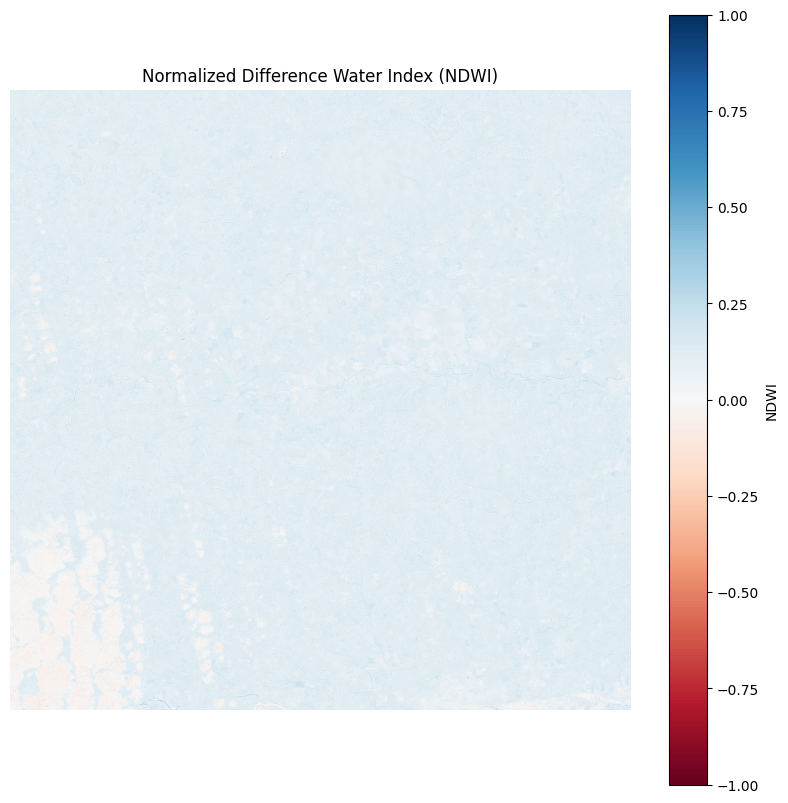

In [22]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path to your stacked Sentinel-2 GeoTIFF file
stacked_image_path = "/Users/wasifqazi/Desktop/FYP_Sentinel_2/output_path/Image_1_stacked.tif"

try:
    # Open the stacked Sentinel-2 image
    with rasterio.open(stacked_image_path) as src:
        # Get image dimensions
        width = src.width
        height = src.height

        # Define a window (e.g., use the entire image or a subset)
        window_width = min(width, 5000)  # Adjust as needed
        window_height = min(height, 5000) # Adjust as needed
        window = rasterio.windows.Window(0, 0, window_width, window_height)

        # Read the required bands - CHECK BAND NUMBERS CAREFULLY
        B3 = src.read(3, window=window)  # Green - Band 3
        B8 = src.read(8, window=window)  # NIR - Band 8

    # Calculate NDWI
    numerator = B3.astype(float) - B8.astype(float)
    denominator = B3.astype(float) + B8.astype(float)
    ndwi = np.where(denominator != 0, numerator / denominator, -9999)

    # Apply a colormap for visualization
    plt.figure(figsize=(10, 10))
    plt.imshow(ndwi, cmap='RdBu', vmin=-1, vmax=1)  # Red-Blue colormap, adjust vmin/vmax as needed
    plt.colorbar(label='NDWI')
    plt.title("Normalized Difference Water Index (NDWI)")
    plt.axis("off")
    plt.show()

except rasterio.RasterioIOError as e:
    print(f"Error opening the image file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

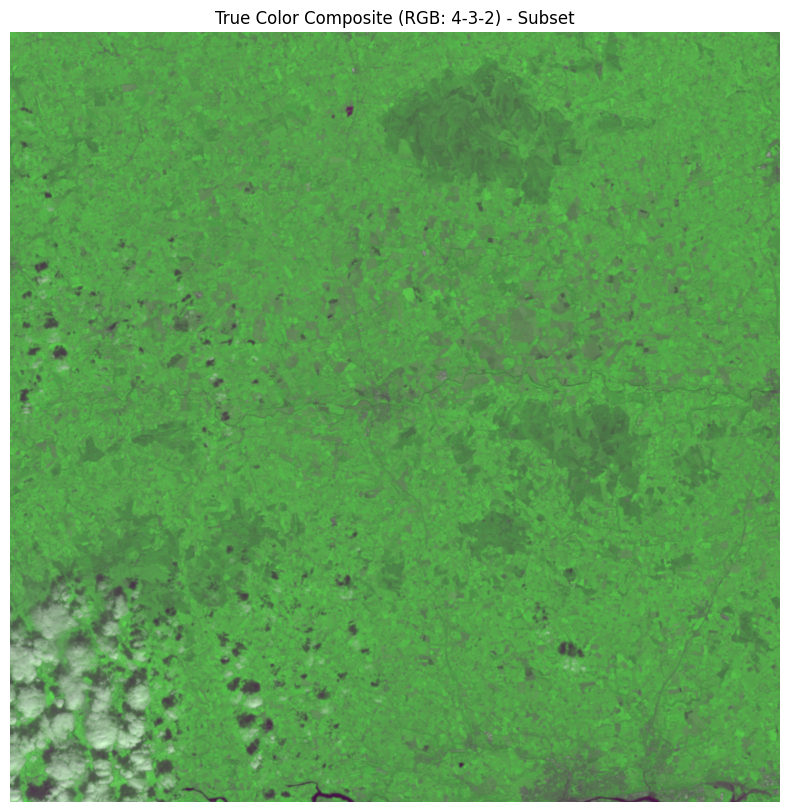

In [23]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path to your stacked Sentinel-2 GeoTIFF file
stacked_image_path = "/Users/wasifqazi/Desktop/FYP_Sentinel_2/output_path/Image_1_stacked.tif"

try:
    # Open the stacked Sentinel-2 image
    with rasterio.open(stacked_image_path) as src:
        # Get image dimensions
        width = src.width
        height = src.height

        # Define a window (e.g., use the entire image or a subset)
        window_width = min(width, 5000)  # Adjust as needed
        window_height = min(height, 5000) # Adjust as needed
        window = rasterio.windows.Window(0, 0, window_width, window_height)

        # Read the required bands - CHECK BAND NUMBERS CAREFULLY
        B2 = src.read(2, window=window)  # Blue - Band 2
        B3 = src.read(3, window=window)  # Green - Band 3
        B4 = src.read(4, window=window)  # Red - Band 4

    # Normalize for display
    def normalize(band):
        band_min, band_max = np.min(band), np.max(band)
        return np.clip((band - band_min) / (band_max - band_min), 0, 1)

    # Stack the RGB bands
    rgb_image = np.stack([normalize(B4), normalize(B3), normalize(B2)], axis=-1)

    # Gamma correction (optional, but often improves the visual appearance)
    gamma = 2.2
    rgb_image = np.power(rgb_image, 1/gamma)

    # Plot the True Color Composite
    plt.figure(figsize=(10, 10))  # Increased figure size
    plt.imshow(rgb_image)
    plt.title("True Color Composite (RGB: 4-3-2) - Subset")
    plt.axis("off")
    plt.show()

except rasterio.RasterioIOError as e:
    print(f"Error opening the image file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [6]:
import rasterio
import numpy as np
import os
import matplotlib.pyplot as plt
from rasterio.windows import Window
import random

# --- Configuration (Adapt These) ---
NUM_CROPS_TARGET = 100

# Path to a single stacked Sentinel-2 GeoTIFF file
stacked_image_path = "/Users/wasifqazi/Desktop/FYP_Sentinel_2/output_path/Image_1_stacked.tif"  # <--- ADJUST THIS!

# Define output directory for cropped patches
crop_output_dir = "/Users/wasifqazi/Desktop/FYP_Sentinel_2/output_path/cropped_patches"  # <--- ADJUST THIS!
os.makedirs(crop_output_dir, exist_ok=True)

# Define crop size (pixels)
CROP_SIZE = 256

# Sentinel-2 L2A scaling factor (if applicable, set to 1.0 if your data is already scaled)
SCALE_FACTOR = 10000.0  # <--- ADJUST THIS!  Set to 1.0 if your data is already scaled.

# --- Adjusted Thresholds (Based on Histogram Analysis) ---
# Note: NDWI thresholds are not used in this version
NDWI_THRESHOLD_LOW = -0.3  # Try increasing this!
NDWI_THRESHOLD_HIGH = 0.3  # Try decreasing this!
CLOUD_THRESHOLD = 0.2  # <--- THIS IS CURRENTLY COMMENTED OUT!  Adapt if needed.
STD_DEV_THRESHOLD = 50  # Try Increasing/Decreasing!

# --- Band Mapping (Double-Check These!) ---
band_map = {
    "blue": 2,  # Sentinel-2 Band 2
    "green": 3,  # Sentinel-2 Band 3
    "red": 4,  # Sentinel-2 Band 4
    "nir": 8,  # Sentinel-2 Band 8
    "swir1": 11,  # Sentinel-2 Band 11
    "swir2": 12,  # Sentinel-2 Band 12
}

# --- Open and Process the Stacked Image ---
with rasterio.open(stacked_image_path) as src:
    # Get image metadata
    transform = src.transform
    crs = src.crs
    height, width = src.height, src.width
    num_bands = src.count

    # Get the dtype from the *first* band in the dataset
    dtype = src.dtypes[0]  # Access the dtype from the band list

    # Initialize lists to store valid crop data
    valid_crops = []

    # --- Iterate through the Image in Crop-Sized Windows ---
    for row in range(0, height, CROP_SIZE):
        for col in range(0, width, CROP_SIZE):
            # Ensure the crop window doesn't extend beyond the image boundaries
            if row + CROP_SIZE <= height and col + CROP_SIZE <= width:
                # Create a Window object for the current crop
                window = Window(col, row, CROP_SIZE, CROP_SIZE)

                # Read the crop data from all bands
                crop = src.read(window=window)

                # --- Extract Relevant Bands (and Scale) ---
                # B3 = crop[band_map["green"] - 1].astype(float) / SCALE_FACTOR  # Green
                # B8 = crop[band_map["nir"] - 1].astype(float) / SCALE_FACTOR  # NIR
                # B11 = crop[band_map["swir1"] - 1].astype(float) / SCALE_FACTOR  # SWIR1

                # --- Variance Filtering ---
                std_devs = [np.std(band) for band in crop]  # Standard deviation of each band
                mean_std_dev = np.mean(std_devs)  # Average standard deviation

                # --- Apply Variance Filter ---
                if mean_std_dev >= STD_DEV_THRESHOLD:  # Only consider crops with enough variance
                    valid_crops.append({
                        "crop": crop,
                        "row": row,
                        "col": col,
                        "mean_std_dev": mean_std_dev
                    })

    # --- Randomly Sample Crops ---
    if len(valid_crops) > NUM_CROPS_TARGET:
        sampled_crops = random.sample(valid_crops, NUM_CROPS_TARGET)
    else:
        sampled_crops = valid_crops  # Use all valid crops if less than target

    # --- Save Sampled Crops ---
    crop_count = 0  # Reset crop counter
    for crop_data in sampled_crops:
        crop = crop_data["crop"]
        row = crop_data["row"]
        col = crop_data["col"]

        # Compute geolocation (UTM or Lat/Lon)
        utmx, utmy = rasterio.transform.xy(transform, row + CROP_SIZE // 2, col + CROP_SIZE // 2)

        # Define output filename
        crop_filename = (
            f"crop_{crop_count}_x{col}_y{row}_utm{int(utmx)}_{int(utmy)}.tif"
        )
        crop_path = os.path.join(crop_output_dir, crop_filename)

        # Write the crop to a new GeoTIFF
        with rasterio.open(
            crop_path,
            "w",
            driver="GTiff",
            height=CROP_SIZE,
            width=CROP_SIZE,
            count=num_bands,  # from input image
            dtype=dtype, #from input image
            crs=crs,
            transform=rasterio.windows.transform(window, transform),
            compress="LZW",  # Enable compression
        ) as dst:
            for i in range(num_bands):
                # Scale the data for each band to avoid issues with type.
                if (i+1) in band_map.values(): #If this band is used in the calculation.
                    dst.write(crop[i].astype(float) / SCALE_FACTOR, i+1)
                else:
                    dst.write(crop[i], i + 1)

        print(f"Saved crop {crop_count}: {crop_path}")
        crop_count += 1

    print(f"Total crops saved: {crop_count}")

Saved crop 0: /Users/wasifqazi/Desktop/FYP_Sentinel_2/output_path/cropped_patches/crop_0_x512_y7168_utm506385_5727055.tif
Saved crop 1: /Users/wasifqazi/Desktop/FYP_Sentinel_2/output_path/cropped_patches/crop_1_x1280_y0_utm514065_5798735.tif
Saved crop 2: /Users/wasifqazi/Desktop/FYP_Sentinel_2/output_path/cropped_patches/crop_2_x2816_y0_utm529425_5798735.tif
Saved crop 3: /Users/wasifqazi/Desktop/FYP_Sentinel_2/output_path/cropped_patches/crop_3_x6656_y1280_utm567825_5785935.tif
Saved crop 4: /Users/wasifqazi/Desktop/FYP_Sentinel_2/output_path/cropped_patches/crop_4_x1024_y4608_utm511505_5752655.tif
Saved crop 5: /Users/wasifqazi/Desktop/FYP_Sentinel_2/output_path/cropped_patches/crop_5_x5888_y5376_utm560145_5744975.tif
Saved crop 6: /Users/wasifqazi/Desktop/FYP_Sentinel_2/output_path/cropped_patches/crop_6_x4608_y1024_utm547345_5788495.tif
Saved crop 7: /Users/wasifqazi/Desktop/FYP_Sentinel_2/output_path/cropped_patches/crop_7_x5376_y5888_utm555025_5739855.tif
Saved crop 8: /Users/wa

In [7]:
# import rasterio
# import numpy as np
# import os
# import matplotlib.pyplot as plt
# from rasterio.windows import Window

# # Path to a single stacked Sentinel-2 GeoTIFF file
# stacked_image_path = "/Users/wasifqazi/Desktop/FYP_Sentinel_2/output_path/Image_1_stacked.tif"

# # Define output directory for cropped patches
# crop_output_dir = "/Users/wasifqazi/Desktop/FYP_Sentinel_2/output_path/cropped_patches"
# os.makedirs(crop_output_dir, exist_ok=True)

# # Define crop size
# CROP_SIZE = 256

# SCALE_FACTOR = 10000.0  # Sentinel-2 L2A scaling factor

# # Adjusted thresholds based on histograms
# NDWI_THRESHOLD_LOW = -0.3  # Increased Negative Value based on histogram
# NDWI_THRESHOLD_HIGH = 0.3  # Increased Positive Value based on histogram
# CLOUD_THRESHOLD = 0.2  # Lower Value based on Histogram, this is very scene dependent

# STD_DEV_THRESHOLD = 10  # Minimum variance to remove noisy crops

# # Band mapping
# band_map = {
#     "green": 3,  # Check these are correct based on your stacking!
#     "nir": 8,
#     "swir1": 11,
#     "red": 4
# }

# with rasterio.open(stacked_image_path) as src:
#     transform = src.transform
#     crs = src.crs
#     height, width = src.height, src.width

#     # Generate crop indices (grid-based sampling)
#     crop_count = 0
#     skipped_ndwi = 0
#     skipped_cloud = 0
#     skipped_variance = 0

#     # Diagnostic flags (set to True to enable diagnostic plots/prints)
#     DIAGNOSTIC_PRINT = True
#     DIAGNOSTIC_PLOTS = True

#     # Store NDWI and SWIR1 values for plotting
#     all_ndwi = []
#     all_swir1 = []
#     all_stddev = []

#     for row in range(0, height, CROP_SIZE):
#         for col in range(0, width, CROP_SIZE):
#             if row + CROP_SIZE <= height and col + CROP_SIZE <= width:
#                 window = Window(col, row, CROP_SIZE, CROP_SIZE)
#                 crop = src.read(window=window)

#                 # Extract bands for NDWI and cloud filtering
#                 #Note how we now get the indeces from the band_map
#                 B3 = crop[band_map["green"] -1].astype(float) / SCALE_FACTOR  # Green band, convert to float and scale
#                 B8 = crop[band_map["nir"] -1].astype(float) / SCALE_FACTOR  # NIR band, convert to float and scale
#                 B11 = crop[band_map["swir1"] -1].astype(float) / SCALE_FACTOR  # SWIR1 band, convert to float and scale

#                 # Print band ranges for diagnostics
#                 if DIAGNOSTIC_PRINT:
#                     print(f"B3 min: {np.min(B3)}, max: {np.max(B3)}, mean: {np.mean(B3)}")
#                     print(f"B8 min: {np.min(B8)}, max: {np.max(B8)}, mean: {np.mean(B8)}")
#                     print(f"B11 min: {np.min(B11)}, max: {np.max(B11)}, mean: {np.mean(B11)}")

#                 # Compute NDWI
#                 ndwi = (B3 - B8) / (B3 + B8 + 1e-6)
#                 avg_ndwi = np.mean(ndwi)

#                 all_ndwi.append(avg_ndwi)  # Append to list for plotting

#                 # Skip crops that are too water-dominated or too dry
#                 if avg_ndwi < NDWI_THRESHOLD_LOW or avg_ndwi > NDWI_THRESHOLD_HIGH:
#                     skipped_ndwi += 1
#                     continue  # Skip crop

#                 # Compute Cloud Mask using SWIR1
#                 avg_swir1 = np.mean(B11)
#                 all_swir1.append(avg_swir1)  # Append to list for plotting

#                 if avg_swir1 > CLOUD_THRESHOLD:
#                     skipped_cloud += 1
#                     continue  # Skip crop

#                 # Compute standard deviation to filter out noisy crops
#                 std_devs = [np.std(band) for band in crop]  # Std dev for each band
#                 mean_std_dev = np.mean(std_devs) # Mean std dev across bands

#                 all_stddev.append(mean_std_dev)


#                 if mean_std_dev < STD_DEV_THRESHOLD:  # Use min_std_dev
#                     skipped_variance += 1
#                     continue

#                 # Convert pixel coordinates to geolocation (UTM or lat/lon)
#                 utmx, utmy = rasterio.transform.xy(transform, row + CROP_SIZE // 2, col + CROP_SIZE // 2)

#                 # Define output TIFF filename
#                 crop_filename = f"crop_{crop_count}_x{col}_y{row}_utm{int(utmx)}_{int(utmy)}.tif"
#                 crop_path = os.path.join(crop_output_dir, crop_filename)

#                 # Save crop as GeoTIFF with geospatial metadata
#                 with rasterio.open(
#                     crop_path, "w",
#                     driver="GTiff",
#                     height=CROP_SIZE,
#                     width=CROP_SIZE,
#                     count=src.count,  # Number of bands
#                     dtype=crop.dtype,
#                     crs=crs,
#                     transform=rasterio.windows.transform(window, transform),
#                     compress='LZW' #ADD COMPRESSION
#                 ) as dst:
#                     for i in range(src.count): #Scale the data for each band to avoid issues with type.
#                         if i+1 in band_map.values(): #If this band is used in the calculation.
#                             dst.write(crop[i].astype(float) / SCALE_FACTOR, i+1)
#                         else:
#                             dst.write(crop[i], i + 1)

#                 print(f"Saved crop {crop_count}: {crop_path}")
#                 crop_count += 1

#     # Plotting diagnostics AFTER the loop
#     if DIAGNOSTIC_PLOTS:
#         plt.figure(figsize=(12, 4))

#         plt.subplot(1, 3, 1)
#         plt.hist(all_ndwi, bins=50)
#         plt.title("NDWI Distribution")
#         plt.axvline(NDWI_THRESHOLD_LOW, color='red', linestyle='--')
#         plt.axvline(NDWI_THRESHOLD_HIGH, color='red', linestyle='--')

#         plt.subplot(1, 3, 2)
#         plt.hist(all_swir1, bins=50)
#         plt.title("SWIR1 Distribution")
#         plt.axvline(CLOUD_THRESHOLD, color='red', linestyle='--')

#         plt.subplot(1, 3, 3)
#         plt.hist(all_stddev, bins=50)
#         plt.title("Std Dev Distribution")
#         plt.axvline(STD_DEV_THRESHOLD, color='red', linestyle='--')

#         plt.tight_layout()
#         plt.show()

#     print("---------------------Summary---------------------")
#     print(f"Total crops skipped based on NDWI : {skipped_ndwi}")
#     print(f"Total crops skipped based on cloud reflectance : {skipped_cloud}")
#     print(f"Total crops skipped based on variance : {skipped_variance}")
#     print(f"Total crops saved : {crop_count}")
#     print("---------------------Summary---------------------")